# Non-linear dataset and Kernels in SVN

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np



In [2]:
X, Y = make_circles(n_samples= 500, noise= 0.02)

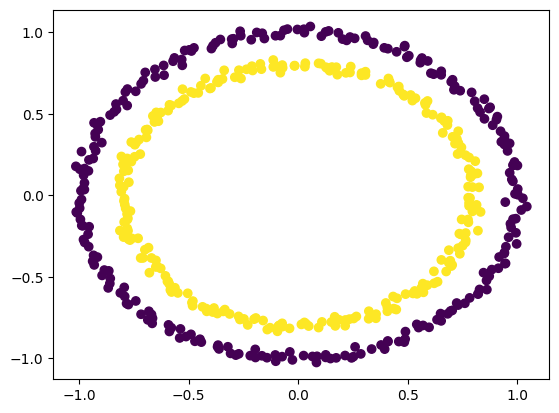

In [3]:
plt.scatter(X[:,0], X[:,1], c = Y)
plt.show()

In [4]:
def phi(x):
    """Non linear transformation"""
    x1 = x[:,0]
    x2 = x[:,1]
    x3 = x1**2 + x2**2
    
    x_ = np.zeros((X.shape[0],3))
    
    
    x_[:,:-1] = X
    x_[:,-1] = x3
    
    return x_

In [5]:
X_ = phi(X)

In [6]:
print(X[:3,:])

[[-0.77523101 -0.67096035]
 [-0.08684487 -0.79837556]
 [-0.97510673  0.16340739]]


In [7]:
print(X_[:3,:])

[[-0.77523101 -0.67096035  1.05117092]
 [-0.08684487 -0.79837556  0.64494557]
 [-0.97510673  0.16340739  0.97753511]]


In [20]:
def plot3d(X, show = True):
    fig = plt.figure(figsize= (10,10))
    ax = fig.add_subplot(111, projection = '3d')
    x1 = X[:,0]
    x2 = X[:,1]
    x3 = X[:,2]
    
    ax.scatter(x1, x2, x3 , zdir = 'z', c = Y, depthshade = True)
    
    if show == True :
        plt.show()
    
    return ax

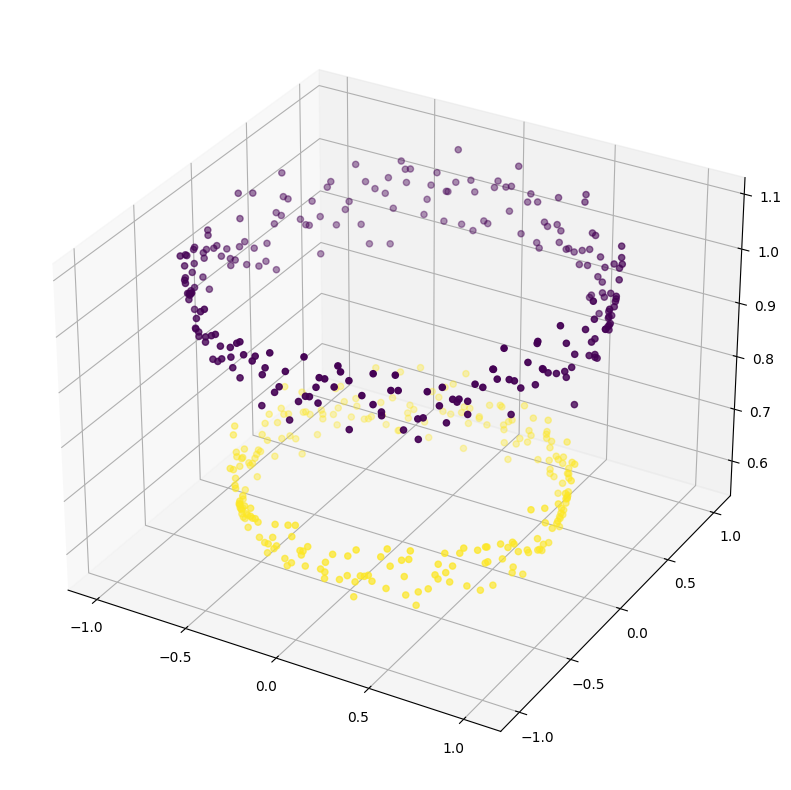

<Axes3D: >

In [21]:
plot3d(X_)

### logistic classifier


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [11]:
lr = LogisticRegression()

In [12]:
acc = cross_val_score(lr, X, Y, cv = 5).mean()
print("accuracy X(2D) is %.4f" %(acc*100))

accuracy X(2D) is 46.0000


### Logistic Classifier on Higher Dimension Space

In [13]:
acc = cross_val_score(lr, X_, Y, cv = 5).mean()
print("accuracy X(3D) is %.4f" %(acc*100))

accuracy X(3D) is 100.0000


# visualise the decision surface


In [14]:
lr.fit(X_,Y)

LogisticRegression()

In [16]:
wts = lr.coef_
bias = lr.intercept_

In [15]:
xx, yy = np.meshgrid(range(-2,2), range(-2,2))

In [18]:
z = -(wts[0,0]*xx + wts[0,1]*yy + bias)/wts[0,2]
print(z)

[[0.82967297 0.82895319 0.82823341 0.82751363]
 [0.82519438 0.8244746  0.82375482 0.82303503]
 [0.82071579 0.819996   0.81927622 0.81855644]
 [0.81623719 0.81551741 0.81479763 0.81407785]]


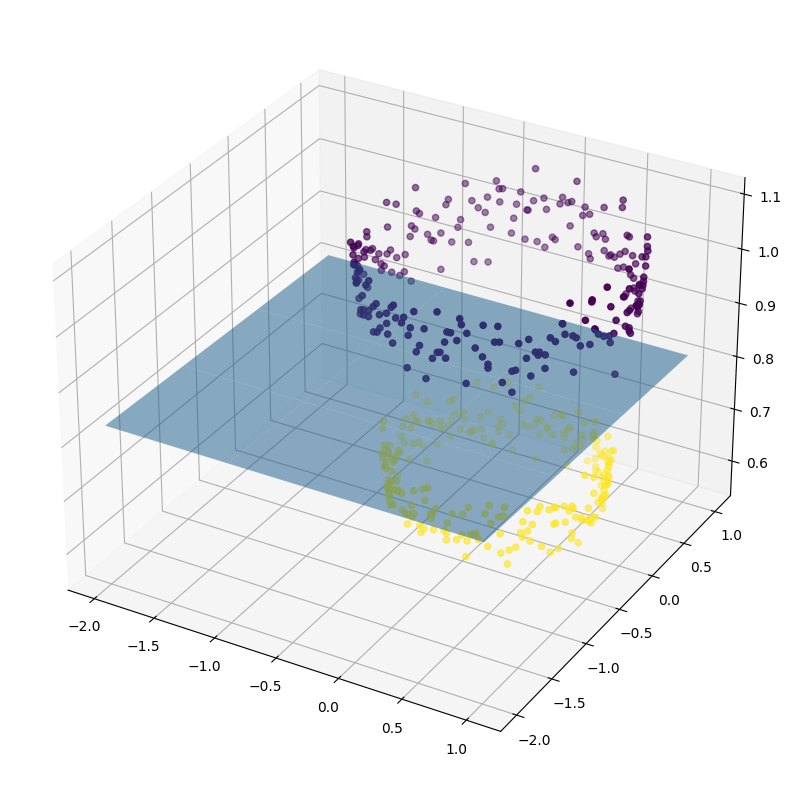

In [25]:
ax = plot3d(X_, False)
ax.plot_surface(xx,yy,z, alpha = 0.5)
plt.show()

## Kernels

In [26]:
from sklearn import svm

### 1. rbf kernel

In [51]:
svc = svm.SVC(kernel = 'rbf')
svc.fit(X,Y)
svc.score(X,Y)

1.0

### 2. Polynomial kernel

In [52]:
svc = svm.SVC(kernel = 'poly')
svc.fit(X,Y)
svc.score(X,Y)

0.53

### 3. Sigmoid

In [53]:
svc = svm.SVC(kernel = 'sigmoid')
svc.fit(X,Y)
svc.score(X,Y)

0.5

### 4. Custom Kernel

In [55]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel = custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0